In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data

Importing Raw Data

In [3]:
cd Downloads

C:\Users\LENOVO\Downloads


In [4]:
data = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [5]:
data.shape

(1200, 28)

In [6]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [7]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [8]:
#Looking for missing values if any
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [9]:
numerical_features= [feature for feature in data.columns if data[feature].dtype!='O']
numerical_features

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

In [15]:
len(numerical_features)

19

In [10]:
catagorical_features=[feature for feature in data.columns if data[feature].dtype=='O']
catagorical_features

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [16]:
len(catagorical_features)

9

The data is supervised and categorical as well as numerical, we have 19 Numerical features and 9 categorical features. The predictor variables are nominal and ordinal. The target variable 'PerformanceRating' is ordinal.

# Exploratory Data Analysis (EDA)

In [18]:
#Creating a new dataframe to analyze department wise performance 
dept = data.iloc[:,[5,27]].copy()
dept_perf = dept.copy()

In [19]:
#finding 
dept_perf.groupby(by='EmpDepartment')["PerformanceRating"].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#We can use barplot as majority of our data is categorical and to compare them
#barplot can be used to show segments of performance rating wrt departments

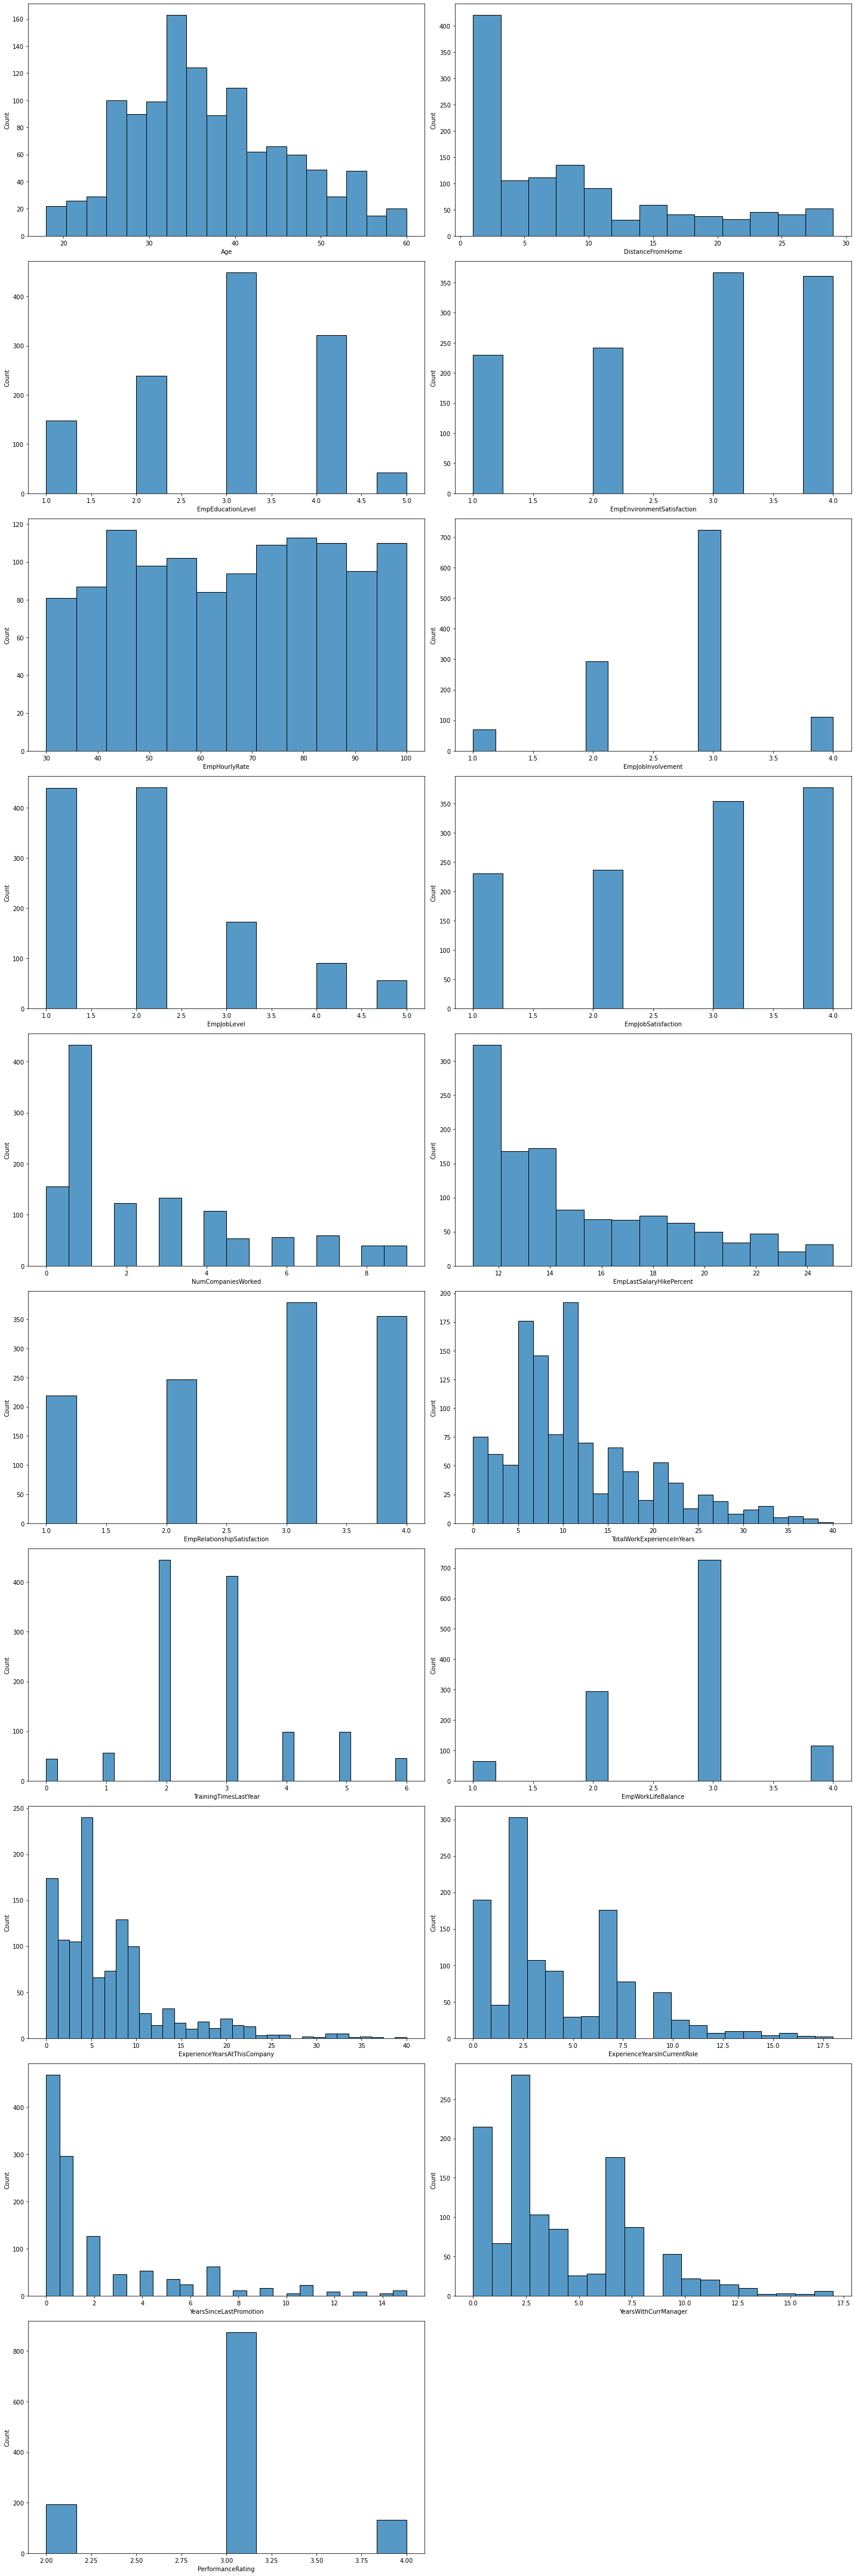

In [23]:
#univariant analysis of Numerical feature
plt.figure(figsize=(20,60))
for i in range(0,len(numerical_features)):
    plt.subplot(10,2,i+1)
    sns.histplot(data[numerical_features[i]])
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

Conclusions:

The average age of an employee at INX Future Inc is 36 years, with the majority falling within the age range of 25 to 45. 

A significant number of employees reside in close proximity to the office. 

The prevailing rating for the job environment among many employees is 3.0. 

Similarly, a substantial portion of the workforce has experience with 0-1 previous companies. 

A significant percentage of employees received a salary increase ranging from 0-12%. 

Additionally, the most common performance rating given by employees is 3.

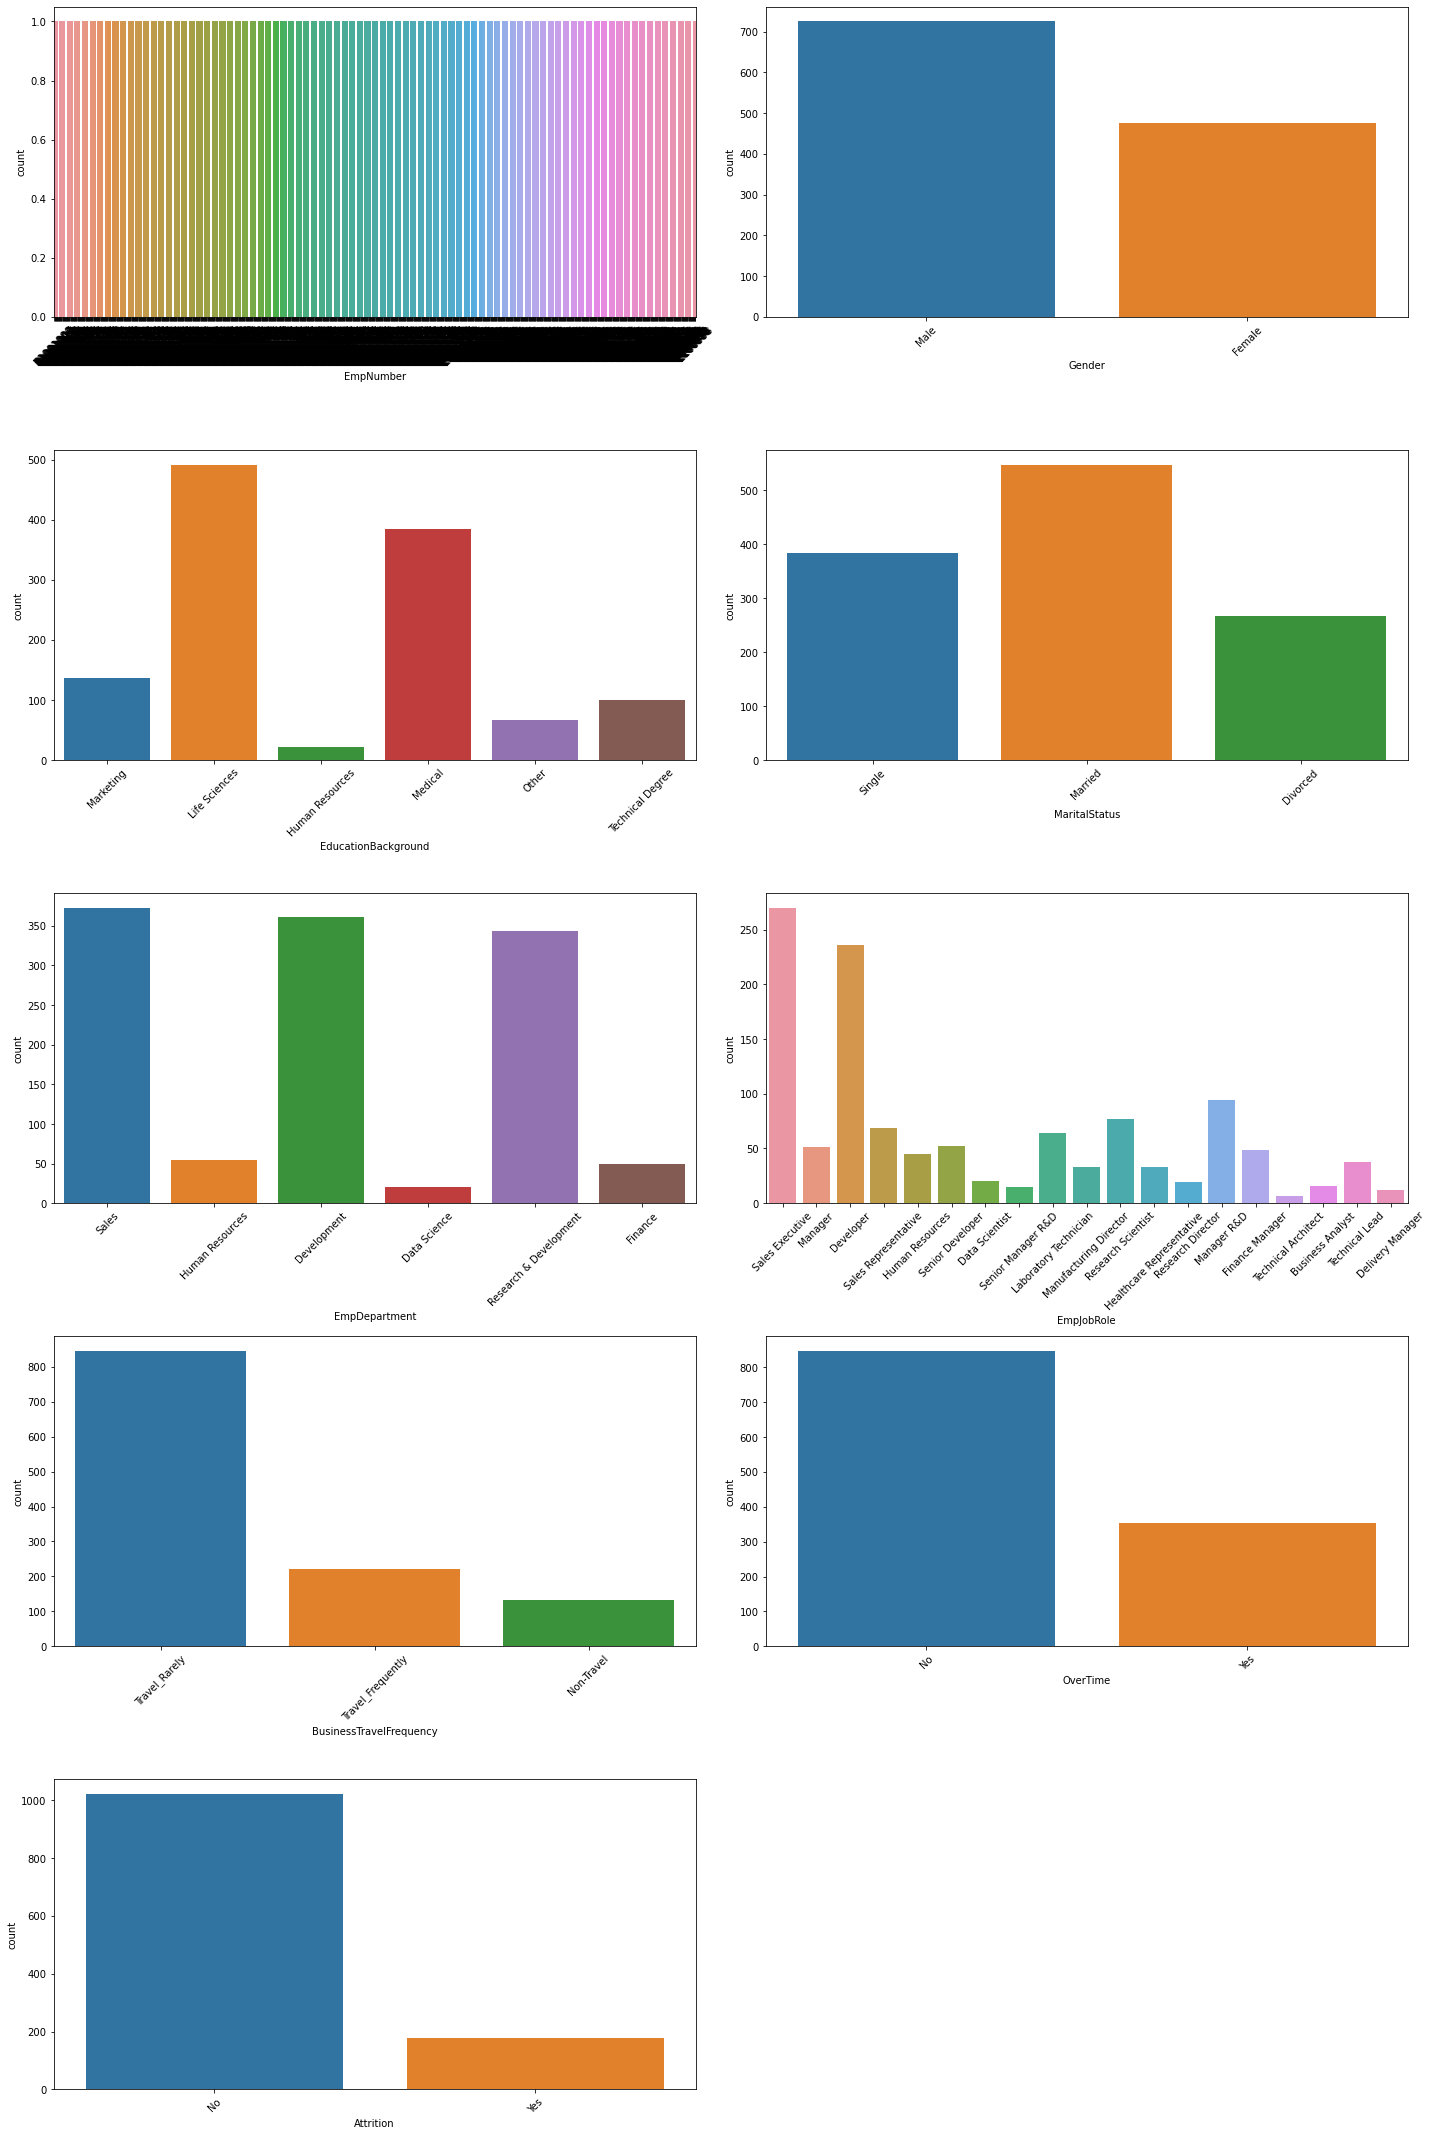

In [24]:
#univariant analysis of categorical feature
plt.figure(figsize=(20,60))
for i in range(0,len(catagorical_features)):
    plt.subplot(10,2,i+1)
    sns.countplot(data[catagorical_features[i]])
    plt.xlabel(catagorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

<AxesSubplot:xlabel='EmpDepartment', ylabel='PerformanceRating'>

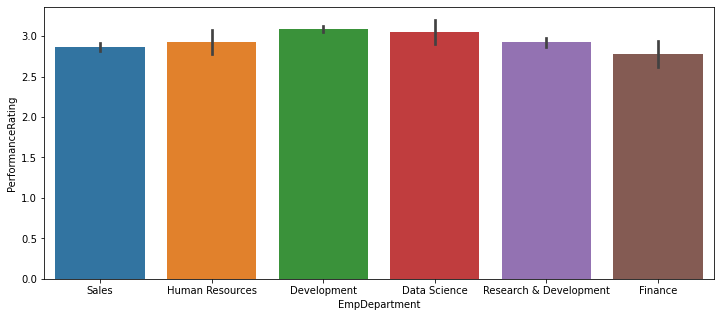

In [36]:
plt.figure(figsize=(12,5))
sns.barplot(dept_perf["EmpDepartment"],dept_perf["PerformanceRating"])

Based on the data from the Employee Department, it is evident that the Development department is exhibiting a higher performance rate in comparison to the other departments.

Following which the Research & Development department demonstrated strong performance. Sales, Human Resources, Data Science, and Finance departments also achieved commendable results.

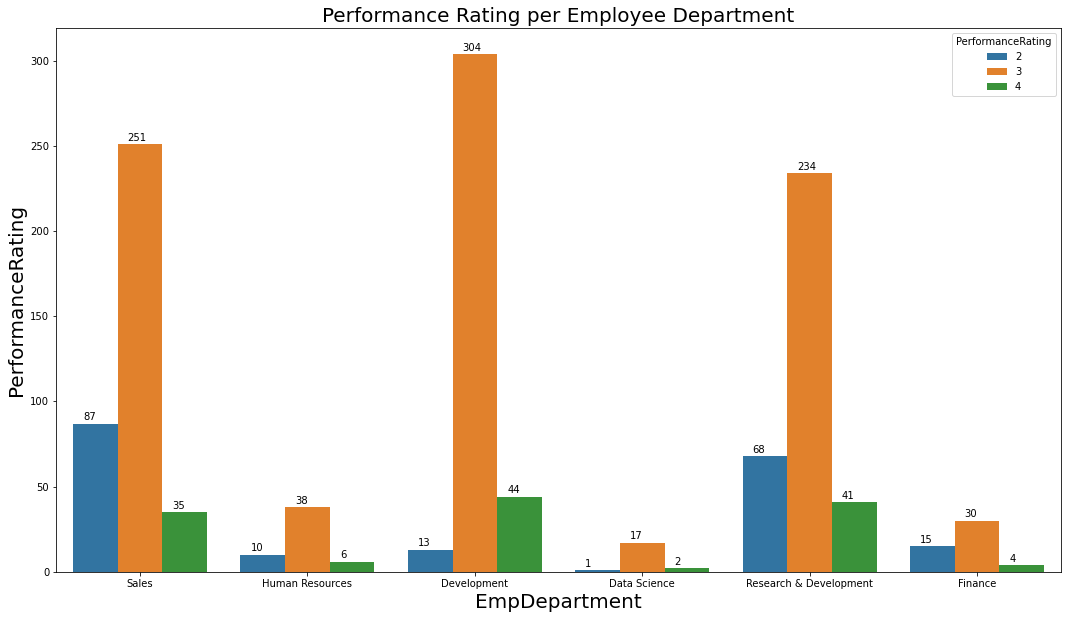

In [37]:
#To analyse each department wrt PerformanceRating we can use 

plt.figure(figsize = (18,10))
ax = sns.countplot(x = "EmpDepartment",hue = data.PerformanceRating, data = data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title("Performance Rating per Employee Department",fontsize = 20)
plt.xlabel("EmpDepartment",fontsize = 20)
plt.ylabel("PerformanceRating",fontsize = 20)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

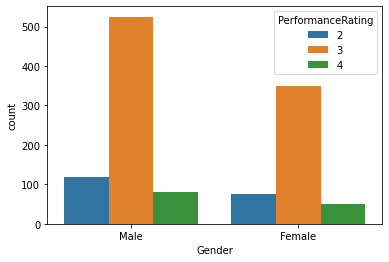

In [ ]:
#creating countplot
sns.countplot(data.Gender,hue=data.PerformanceRating)

<AxesSubplot:xlabel='Gender', ylabel='EmpHourlyRate'>

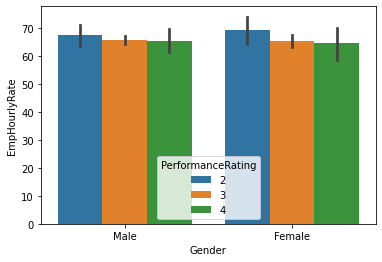

In [39]:
sns.barplot(data.Gender,data.EmpHourlyRate,hue=data.PerformanceRating)

Male employees tend to receive higher ratings compared to female employees, potentially due to the higher proportion of male employees within the company.

<AxesSubplot:xlabel='EducationBackground', ylabel='count'>

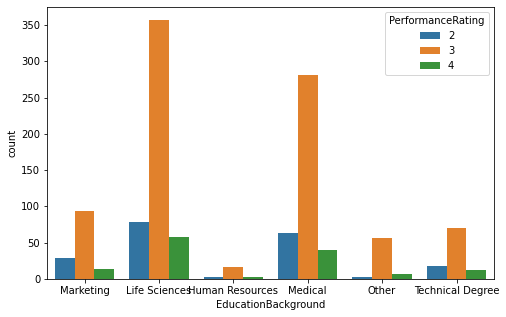

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(data.EducationBackground,hue=data.PerformanceRating)

<AxesSubplot:xlabel='EducationBackground', ylabel='Age'>

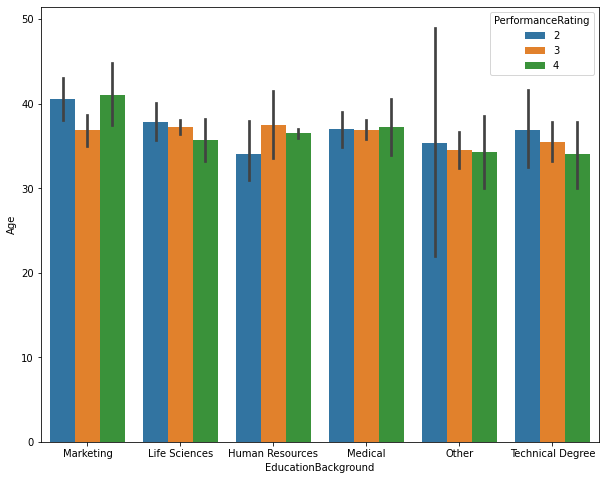

In [41]:
plt.figure(figsize=(10,8))
sns.barplot(data.EducationBackground,data.Age,hue=data.PerformanceRating)

Employees with an educational background in Life Science and Medical fields tend to receive higher ratings.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

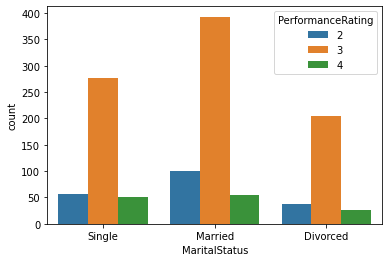

In [42]:
sns.countplot(data.MaritalStatus,hue=data.PerformanceRating)

<AxesSubplot:xlabel='BusinessTravelFrequency', ylabel='count'>

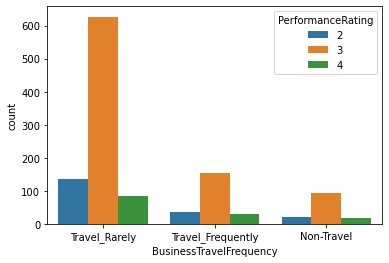

In [43]:
sns.countplot(data.BusinessTravelFrequency,hue=data.PerformanceRating)

Employees who travel rarely tend to receive higher ratings compared to those who travel frequently or those who do not travel at all.

<AxesSubplot:xlabel='OverTime', ylabel='count'>

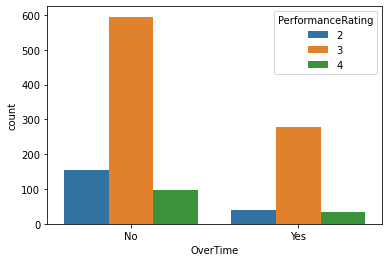

In [44]:
sns.countplot(data.OverTime,hue=data.PerformanceRating)

Overtime degradrages the performance of employees

<AxesSubplot:xlabel='Attrition', ylabel='count'>

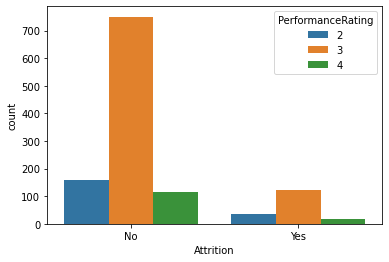

In [45]:
sns.countplot(data.Attrition,hue=data.PerformanceRating)

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

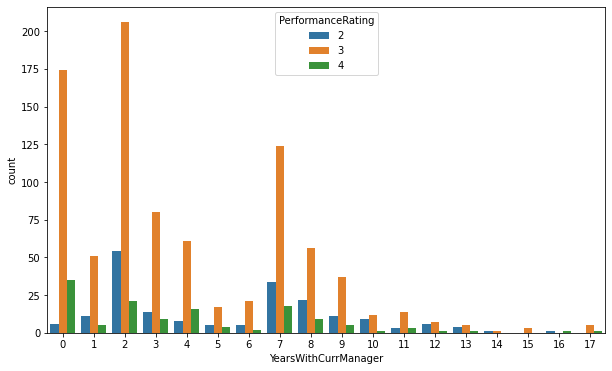

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(data.YearsWithCurrManager,hue=data.PerformanceRating)

The performance rating of an employee is influenced by the duration of time they have spent with their current manager. When an employee has the same manager for an extended period, their performance tends to decrease. Therefore, to enhance employee performance, it is advisable for managers to be rotated or shuffled every 2-3 years. This practice can contribute to maintaining a fresh perspective and fostering improved performance among employees.

<AxesSubplot:xlabel='EmpWorkLifeBalance', ylabel='count'>

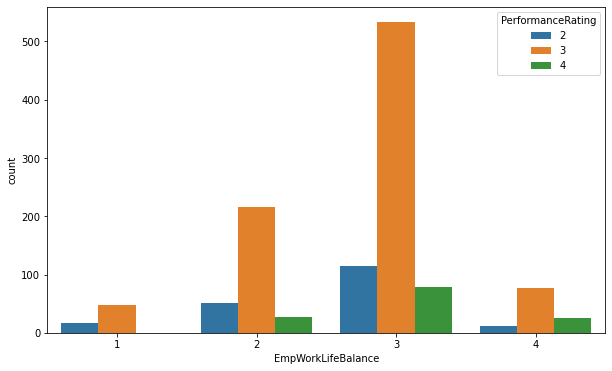

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(data.EmpWorkLifeBalance,hue=data.PerformanceRating)

<AxesSubplot:xlabel='EmpRelationshipSatisfaction', ylabel='count'>

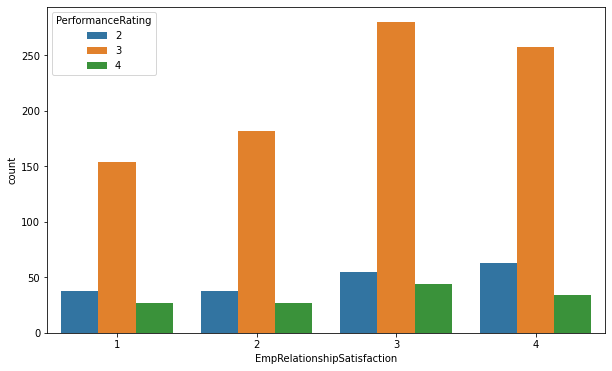

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(data.EmpRelationshipSatisfaction,hue=data.PerformanceRating)

<AxesSubplot:xlabel='TotalWorkExperienceInYears', ylabel='count'>

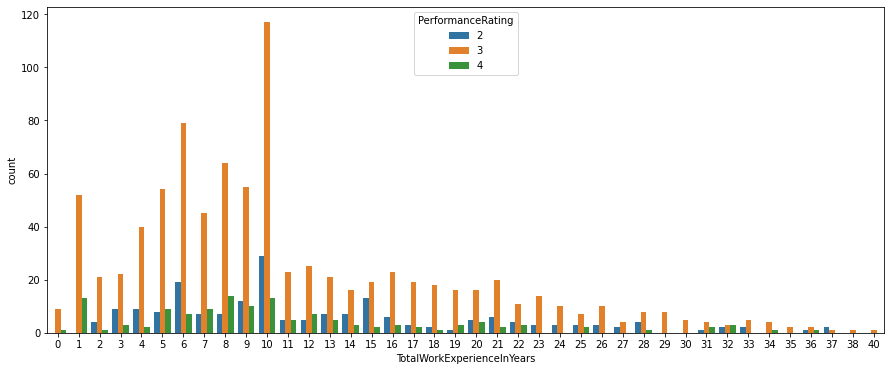

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(data.TotalWorkExperienceInYears,hue=data.PerformanceRating)

Employee performance is influenced by various factors, including their work-life balance. When employees have a favorable work-life balance and are rated at level 3, their performance tends to be higher. Similarly, greater satisfaction in employee relationships also correlates with improved employee performance.

However, it's noteworthy that when the total work experience of an employee surpasses 10 years, their performance tends to decline. This suggests that there might be challenges or dynamics that impact performance as employees accumulate extensive work experience.

<AxesSubplot:xlabel='EmpLastSalaryHikePercent', ylabel='count'>

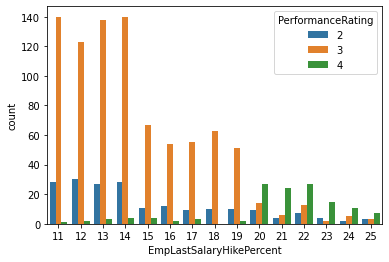

In [50]:
sns.countplot(data.EmpLastSalaryHikePercent,hue=data.PerformanceRating)

Employee performance demonstrates a positive correlation with salary hikes exceeding 19%. Notably, employees who receive a higher percentage of salary hike tend to exhibit better performance.

# Data Processing

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
# Encoding all the ordinal columns and creating a dummy variable
#for them to see if there are any effects on Performance Rating

encode = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    data.iloc[:,i]=encode.fit_transform(data.iloc[:,i])

In [53]:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,0,3,0,5,13,1,3,1,...,2,6,3,3,6,5,0,4,0,4
1196,E100993,37,1,1,2,1,15,2,10,2,...,1,4,2,3,1,0,0,0,0,3
1197,E100994,50,1,3,1,1,15,2,28,1,...,3,20,3,3,20,8,3,8,0,3
1198,E100995,34,0,3,2,0,1,2,9,3,...,2,9,3,4,8,7,7,7,0,3


<AxesSubplot:>

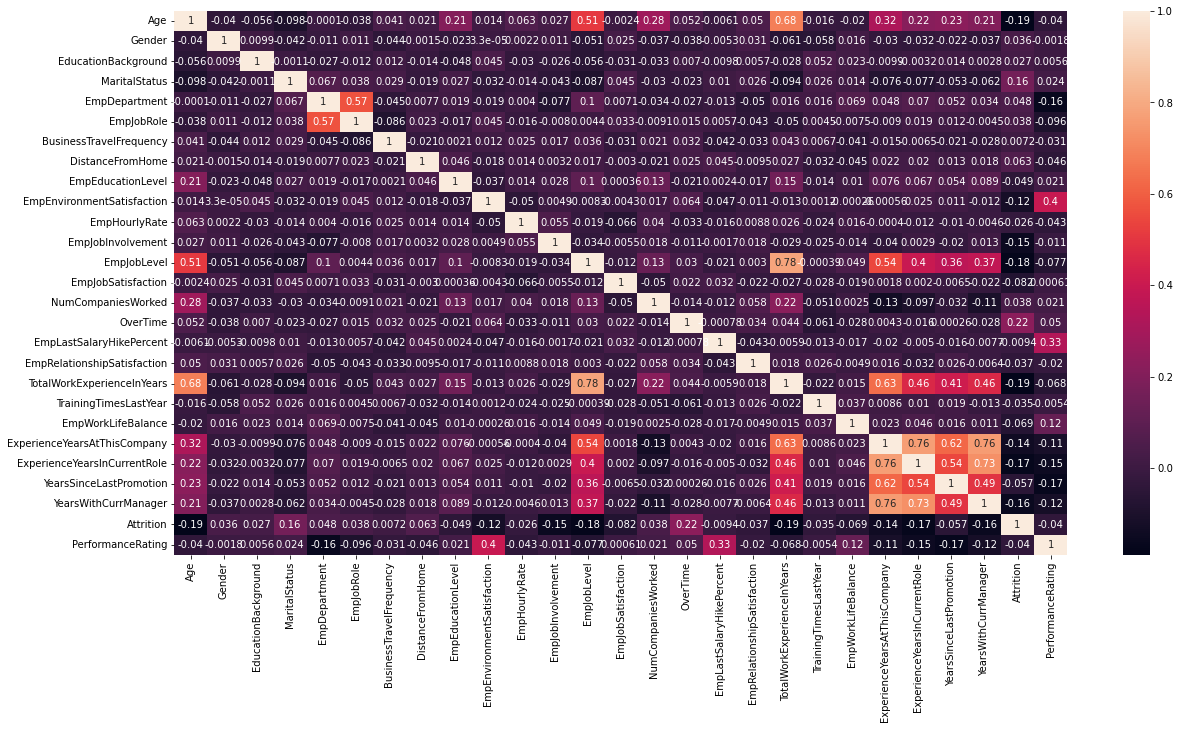

In [55]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

# Feature Selection

In [56]:
#Finding out the correlation coefficent
data.corr()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,0.013814,...,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,0.000033,...,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,0.045028,...,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,-0.032467,...,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,-0.019237,...,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,0.044612,...,-0.043067,-0.049529,0.004452,-0.007519,-0.009047,0.019383,0.012190,-0.004504,0.037508,-0.096209
BusinessTravelFrequency,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,0.012267,...,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,-0.017719,...,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,-0.037103,...,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,0.000033,0.045028,-0.032467,-0.019237,0.044612,0.012267,-0.017719,-0.037103,1.000000,...,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,-0.123490,0.395561


In [57]:
#Dropping unnecessary columns
data.drop(["EmpNumber"],inplace=True,axis=1)

In [58]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


# Defining independent and dependent features

In [59]:
#Now we will select only those columns as input variables having
#correlation coefficent  greater than 0.1

X=data.iloc[:,[4,5,9,16,20,21,22,23,24]]
y=data.PerformanceRating

In [60]:
y.unique()

array([3, 4, 2], dtype=int64)

# Train-Test-Split

In [61]:
#Splitting the data into train and test for further calculation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [62]:
#Using standardization to standardize the data
from sklearn.preprocessing import StandardScaler

In [63]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [64]:
X_test

array([[-1.31188536, -1.28813861, -1.58162342, ..., -0.64085498,
        -0.0719949 , -0.60086559],
       [ 1.04877058,  0.83334546, -0.66028939, ...,  0.73547786,
         1.47075293,  0.79920957],
       [-0.13155739, -0.65169339,  1.18237868, ..., -0.09032184,
        -0.68909403, -0.04083553],
       ...,
       [-0.72172137, -1.0759902 , -0.66028939, ..., -0.36558841,
        -0.38054447, -0.60086559],
       [-1.31188536, -1.28813861, -0.66028939, ...,  0.73547786,
        -0.0719949 ,  1.0792246 ],
       [ 1.04877058,  0.83334546,  0.26104464, ...,  0.73547786,
        -0.68909403,  0.79920957]])

In [65]:
y_test

1178    3
865     2
101     3
439     3
58      3
       ..
382     3
867     3
542     2
1193    3
874     3
Name: PerformanceRating, Length: 240, dtype: int64

In [66]:
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)

(960, 9)
(960,)
(240, 9)
(240,)


# Applying Algorithms and checking accuracy

# 1. Logistic Regression

In [67]:
#Training
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression()

In [68]:
#Testing
y_predict_logr = model_logr.predict(X_test)
y_predict_logr

array([3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 2, 3, 3, 3, 3, 4, 4, 2, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       2, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 4, 2, 3, 3, 3, 3, 3, 3, 4, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 2, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 3, 4, 3, 2, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3],
      dtype=int64)

In [69]:
y_test.value_counts()

3    184
2     29
4     27
Name: PerformanceRating, dtype: int64

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [71]:
#Evaluation
#Confusion matrix

confusion_matrix(y_test,y_predict_logr)

array([[ 15,  13,   1],
       [ 11, 171,   2],
       [  0,   8,  19]], dtype=int64)

In [72]:
#Finding accuracy,precision and recall
print(accuracy_score(y_test,y_predict_logr))
print(classification_report(y_test,y_predict_logr))

0.8541666666666666
              precision    recall  f1-score   support

           2       0.58      0.52      0.55        29
           3       0.89      0.93      0.91       184
           4       0.86      0.70      0.78        27

    accuracy                           0.85       240
   macro avg       0.78      0.72      0.74       240
weighted avg       0.85      0.85      0.85       240



# 2. Decision Tree with GridSearchCV

In [73]:
#Training
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model_dtg = DecisionTreeClassifier(random_state = 42, splitter = "best")
parameters = {"criterion":("gini","entropy"), 'min_samples_split':[2,3,4,5]}

clf = GridSearchCV(model_dtg,parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'criterion': 'entropy', 'min_samples_split': 4}

In [74]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model_dtg, scoring='accuracy',X = X,\
                            y = y, cv = 25)
print("Accuracy Mean {} Accuracy Variance \
{}".format(accuracies.mean(),accuracies.std()))

Accuracy Mean 0.8891666666666665 Accuracy Variance 0.048491121753253846


In [75]:
y_predict_dt = clf.predict(X_test)
y_predict_dt

array([3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 2, 2, 2, 3, 2, 4, 2, 2, 3,
       3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 3, 3, 4, 4, 4, 3, 2, 3, 3],
      dtype=int64)

In [76]:
#Accuracy
accuracy_score(y_test,y_predict_dt)

0.8875

In [77]:
#Classification Report
classification_report(y_test,y_predict_dt)

'              precision    recall  f1-score   support\n\n           2       0.77      0.79      0.78        29\n           3       0.92      0.93      0.93       184\n           4       0.76      0.70      0.73        27\n\n    accuracy                           0.89       240\n   macro avg       0.82      0.81      0.81       240\nweighted avg       0.89      0.89      0.89       240\n'

In [78]:
confusion_matrix(y_test,y_predict_dt)

array([[ 23,   6,   0],
       [  7, 171,   6],
       [  0,   8,  19]], dtype=int64)

# 3. Random Forest with GridSearchCV

In [79]:
#Training
from sklearn.ensemble import RandomForestClassifier

model_rfg = RandomForestClassifier(random_state = 33, n_estimators = 23)
parameters = [{"min_samples_split":[2,3,4,5],"criterion":["gini","entropy"],"min_samples_leaf":[1,2,3]}]

rf = GridSearchCV(model_rfg,parameters)
rf.fit(X_train,y_train)
rf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [80]:
from sklearn.model_selection import cross_val_score
accuracies_rf = cross_val_score(estimator = model_rfg, scoring='accuracy',X = X,\
                            y = y, cv = 25)
print("Accuracy Mean {} Accuracy Variance \
{}".format(accuracies_rf.mean(),accuracies_rf.std()))

Accuracy Mean 0.9308333333333333 Accuracy Variance 0.04154983620772637


In [81]:
#Predicting
y_predict_rf = rf.predict(X_test)
y_predict_rf

array([3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 2, 2, 3, 3, 4, 2, 2, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 4, 3, 2, 2, 3, 4, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 4, 4, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 2, 3, 3],
      dtype=int64)

In [82]:
#Finding accuracy
accuracy_score(y_test,y_predict_rf)

0.9583333333333334

In [83]:
#Classification Report
classification_report(y_test,y_predict_rf)

'              precision    recall  f1-score   support\n\n           2       0.96      0.93      0.95        29\n           3       0.95      0.99      0.97       184\n           4       1.00      0.74      0.85        27\n\n    accuracy                           0.96       240\n   macro avg       0.97      0.89      0.92       240\nweighted avg       0.96      0.96      0.96       240\n'

In [84]:
#Confusion Matrix
confusion_matrix(y_test,y_predict_rf)

array([[ 27,   2,   0],
       [  1, 183,   0],
       [  0,   7,  20]], dtype=int64)

# 4. K-Nearest Neighbor

In [85]:
#Training
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [86]:
#Predicting the model

y_predict_knn = model_knn.predict(X_test)
y_predict_knn

array([3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 2, 3, 3, 2, 4, 3, 3, 2, 3, 3, 4, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3],
      dtype=int64)

In [87]:
#Finding accuracy
accuracy_score(y_test,y_predict_knn)

0.8541666666666666

In [88]:
#Classification_Report
classification_report(y_test,y_predict_knn)

'              precision    recall  f1-score   support\n\n           2       0.61      0.69      0.65        29\n           3       0.89      0.93      0.91       184\n           4       1.00      0.52      0.68        27\n\n    accuracy                           0.85       240\n   macro avg       0.83      0.71      0.75       240\nweighted avg       0.87      0.85      0.85       240\n'

In [89]:
confusion_matrix(y_test,y_predict_knn)

array([[ 20,   9,   0],
       [ 13, 171,   0],
       [  0,  13,  14]], dtype=int64)

# 5. Support Vector Machine

In [90]:
#Training
from sklearn.svm import SVC
model_svm = SVC(kernel = "rbf",C=100,random_state = 10).fit(X_train,y_train)

In [91]:
#Predicting the model
y_predict_svm = model_svm.predict(X_test)
y_predict_svm

array([3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 4, 3, 2, 3, 3, 3, 2, 4, 2, 2, 3,
       3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 2, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 4, 2, 3, 3, 3, 3, 2, 4, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 2, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       4, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3,
       3, 2, 4, 3, 4, 4, 3, 3, 3, 2, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3],
      dtype=int64)

In [92]:
#Finding accuracy
accuracy_score(y_test,y_predict_svm)

0.8458333333333333

In [93]:
#Classification_Report
classification_report(y_test,y_predict_svm)

'              precision    recall  f1-score   support\n\n           2       0.68      0.72      0.70        29\n           3       0.91      0.89      0.90       184\n           4       0.62      0.67      0.64        27\n\n    accuracy                           0.85       240\n   macro avg       0.74      0.76      0.75       240\nweighted avg       0.85      0.85      0.85       240\n'

In [94]:
confusion_matrix(y_test,y_predict_svm)

array([[ 21,   7,   1],
       [ 10, 164,  10],
       [  0,   9,  18]], dtype=int64)

# 6. Naive Bayes Bernoulli

In [95]:
#Training
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(X_train,y_train)

BernoulliNB()

In [96]:
# Predicting the model
y_predict_nb = model_nb.predict(X_test)

In [97]:
accuracy_score(y_test,y_predict_nb)

0.7875

In [98]:
classification_report(y_test,y_predict_nb)

'              precision    recall  f1-score   support\n\n           2       0.59      0.59      0.59        29\n           3       0.82      0.93      0.87       184\n           4       0.00      0.00      0.00        27\n\n    accuracy                           0.79       240\n   macro avg       0.47      0.51      0.49       240\nweighted avg       0.70      0.79      0.74       240\n'

In [99]:
confusion_matrix(y_test,y_predict_nb)

array([[ 17,  12,   0],
       [ 12, 172,   0],
       [  0,  27,   0]], dtype=int64)

# 7.Artificial Neural Network

In [100]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [101]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [102]:
#Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.9083333333333333
              precision    recall  f1-score   support

           2       0.81      0.90      0.85        29
           3       0.95      0.93      0.94       184
           4       0.77      0.74      0.75        27

    accuracy                           0.91       240
   macro avg       0.84      0.86      0.85       240
weighted avg       0.91      0.91      0.91       240



In [103]:
confusion_matrix(y_test,y_predict_mlp)

array([[ 26,   3,   0],
       [  6, 172,   6],
       [  0,   7,  20]], dtype=int64)

In [73]:
#Highest accuracy acheived = 95%
#Using Random Forest

# Conclusion


Based on the findings, it is evident that creating a conducive work environment significantly enhances employee performance. The company should consider implementing measures such as regular salary increments and promoting work-life balance to further boost performance. However, it's important to note that rotating managers periodically could potentially have an impact on performance. Therefore, a well-balanced approach to managing managerial transitions should be considered to ensure continued high performance.